# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 2. Teorie - před odevzdáním prosíme smazat včetně ilustračních obrázků.

Pokud znáte základní teorii okolo EKG signálů, můžete tuhle část přeskočit. Teorie je doopravdy stručná, neboť teorie EKG není cílem tohoto předmětu.

EKG signál má několik základních částí:
  

1.   P vlnu, která značí počátek kontrakce předsíní
2.   QRS komplex vln, který vzniká depolarizací komor (jejich stažením)
3.   T vlna jako poslední představuje repolarizaci komor (tedy jejich zpětné roztažení)

Nás bude zajímat především QRS komplex, který se ve spektru nachází mezi 10 Hz a 20 Hz. Z polohy QRS lze určit RR interval - vzdálenost mezi jednotlivými R vlnami. RR interval je přímo spojený se srdečním tepem. Na obrázku spektra EKG signálu můžete také vidět, na kterých frekvencích se nachází P a T vlna, kterou my ale v projektu odfiltrujeme.

EKG se snímá v několika základních rozloženích elektrodových svodů. V nemocnici se potkáte nejčastěji s 12 svodovým EKG. V projektu dostanete jeden z těchto svodů.


#### Popis EKG





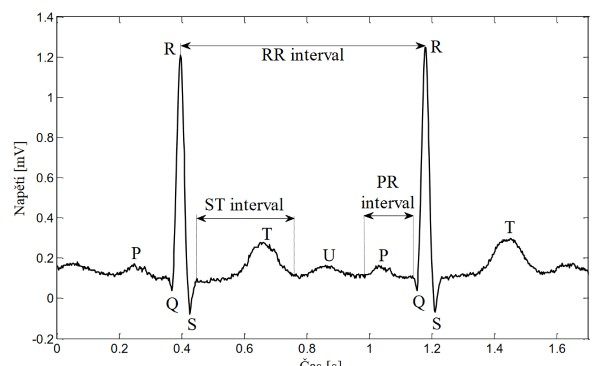

#### EKG ve spektru

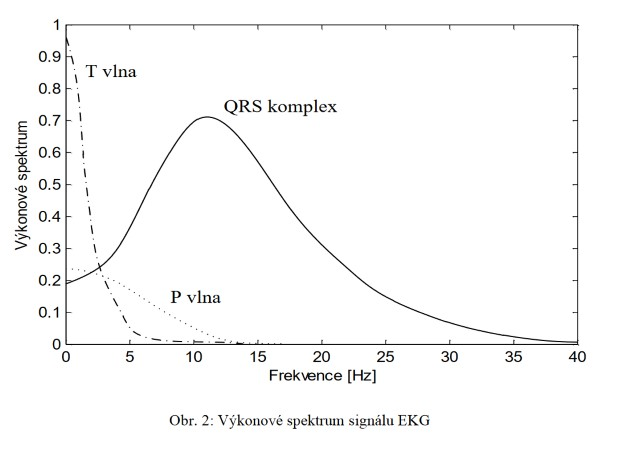

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [ ]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xpator00.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xpator00.wav")


--2023-12-17 16:01:26--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xpator00.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xpator00.wav’

xpator00.wav        100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 16:01:28 (168 MB/s) - ‘xpator00.wav’ saved [10044/10044]

--2023-12-17 16:01:28--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav’

FIB.wav             100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 16:0

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

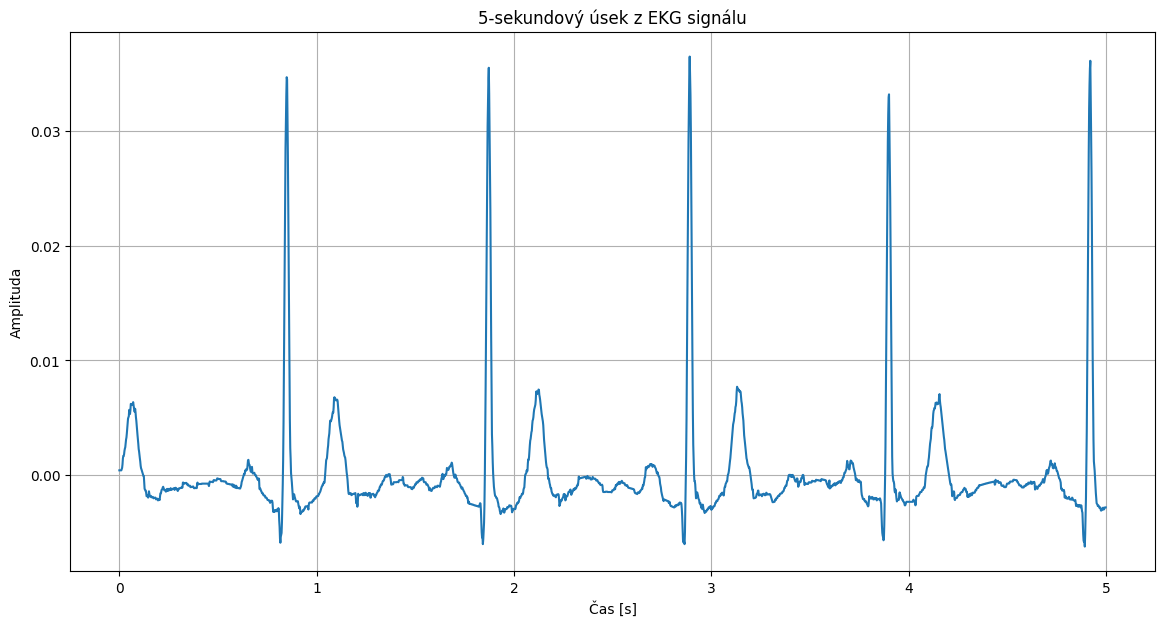

In [ ]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# Nahrání EKG signálu
ekg_signal, fs = sf.read("xpator00.wav")

# Specifikace začátku a konce 5-sekundového úseku
start_time = 0
end_time = start_time + 5
first_sample = start_time * fs
last_sample = end_time * fs
ekg_signal_5s = ekg_signal[first_sample:last_sample]

# Zobrazení 5-sekundového signálu
plt.figure(figsize = (14, 7))
plt.plot(np.arange(first_sample, last_sample) / fs, ekg_signal_5s)
plt.title('5-sekundový úsek z EKG signálu')
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)

plt.show()

b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

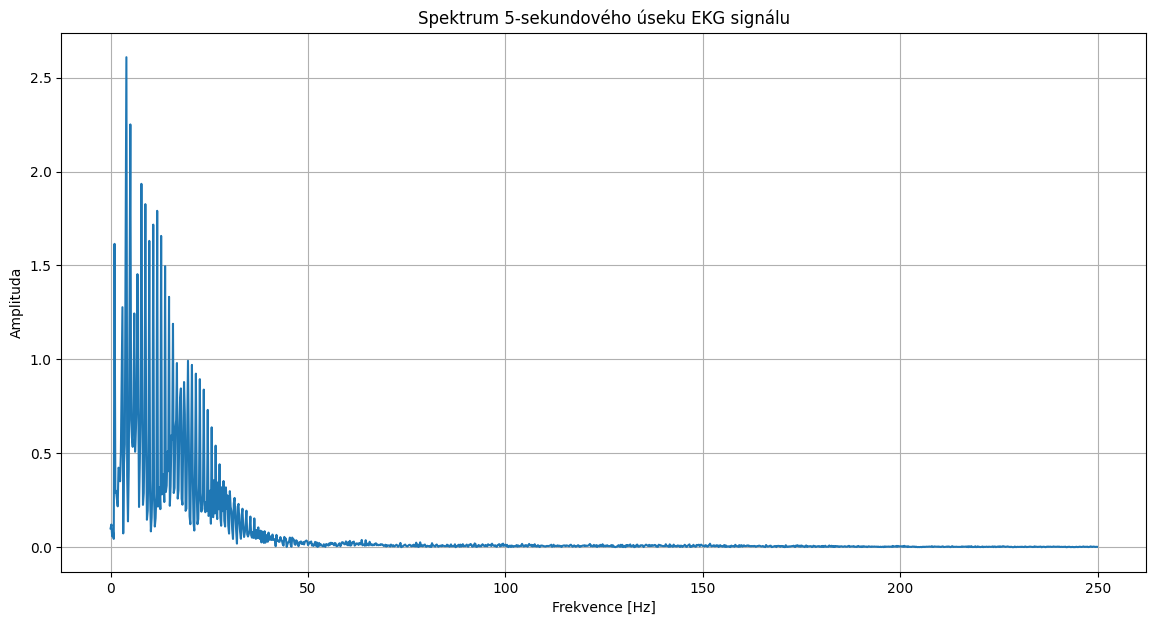

In [ ]:
# Výpočet frekvenční osy pomocí Fourierovy transformace
frekvence = np.fft.fftshift(np.fft.fftfreq(len(ekg_signal_5s), 1/fs))

# Výpočet spektra pomocí Fourierovy transformace
spektrum = np.fft.fftshift(np.abs(np.fft.fft(ekg_signal_5s)))

# Zobrazení poloviny spektra
polovicni_len = len(frekvence) // 2
plt.figure(figsize=(14, 7))
plt.plot(frekvence[polovicni_len:], spektrum[polovicni_len:])
plt.title('Spektrum 5-sekundového úseku EKG signálu')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.show()

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Rušení je způsobeno elektromagnetickým rušením. Toto rušení vzniká v elektrických zařízeních a elektrických sítích. V Evropě mají elektrické sítě napětí o frekvenci 50 Hz. A v Americe mají elektrické sítě napětí o frekvenci 60 Hz. Elektromagnetické rušení proniká do elektrických zařízení a způsobuje rušení na 50 Hz nebo 60 Hz a jejich harmonických frekvencích.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

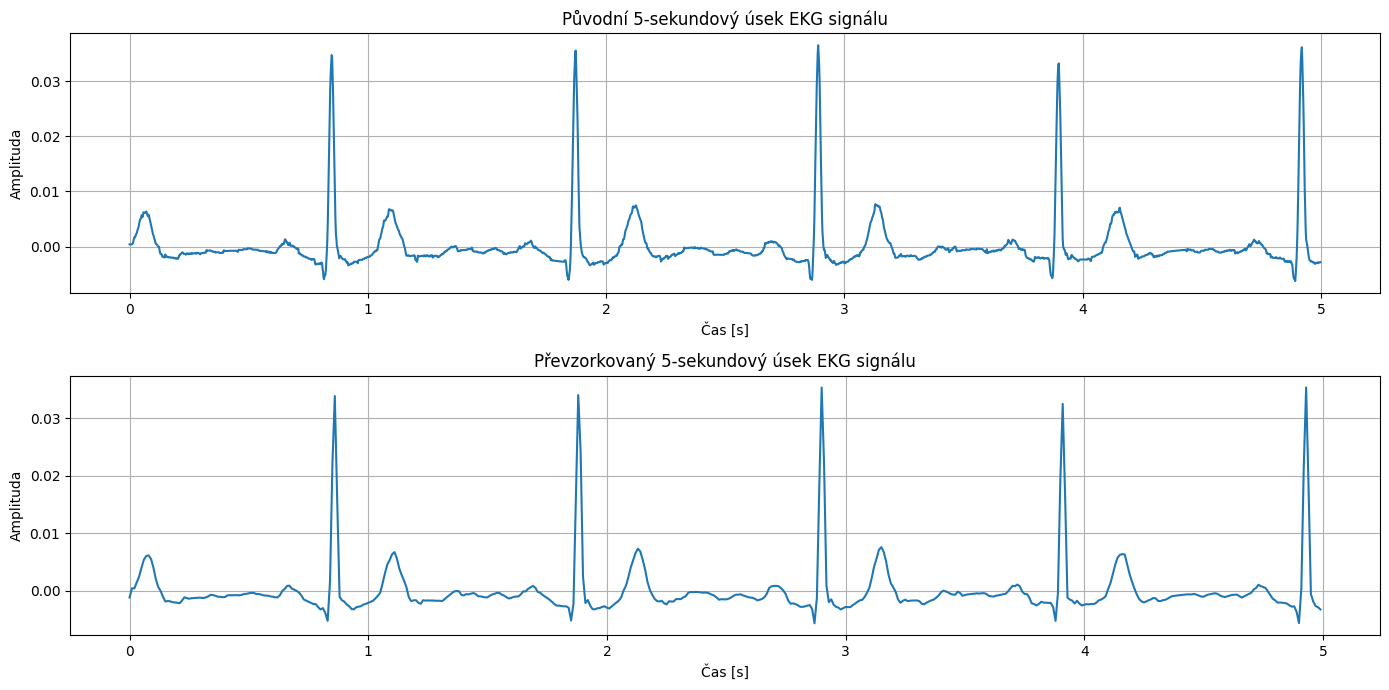

In [ ]:
from scipy.signal import butter, lfilter, resample
import matplotlib.pyplot as plt
import numpy as np

# Cílová vzorkovací frekvence
cilova_vzorkovaci_frekvence = 100

# Antialiasing filtr
nyquist = fs / 2
nyquist_new = cilova_vzorkovaci_frekvence / 2
cutoff_frekvence = nyquist_new * 0.8

# Návrh a aplikace Butterworth filtru
b, a = butter(4, cutoff_frekvence / nyquist, btype='low')

# Filtrace signálu pro antialiasing
ekg_signal_filtrovany = lfilter(b, a, ekg_signal_5s)

# Převzorkování signálu na 100 Hz
ekg_signal_filtrovany = resample(ekg_signal_filtrovany, int(len(ekg_signal_filtrovany) * cilova_vzorkovaci_frekvence / fs))

# Vytvoření časové osy pro původní signál
casova_osa_puvodni = np.arange(start_time, end_time, 1 / fs)

# Vytvoření časové osy pro převzorkovaný signál
casova_osa_prevzorkovany = np.arange(0, len(ekg_signal_filtrovany) / cilova_vzorkovaci_frekvence, 1 / cilova_vzorkovaci_frekvence)

# Zobrazení původního a převzorkovaného 5-sekundového signálu
plt.figure(figsize=(14, 7))

# Původní 5-sekundový úsek EKG signálu
plt.subplot(2, 1, 1)
plt.plot(casova_osa_puvodni, ekg_signal_5s)
plt.title('Původní 5-sekundový úsek EKG signálu')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)

# Převzorkovaný 5-sekundový úsek EKG signálu
plt.subplot(2, 1, 2)
plt.plot(casova_osa_prevzorkovany, ekg_signal_filtrovany)
plt.title('Převzorkovaný 5-sekundový úsek EKG signálu')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

*b*) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

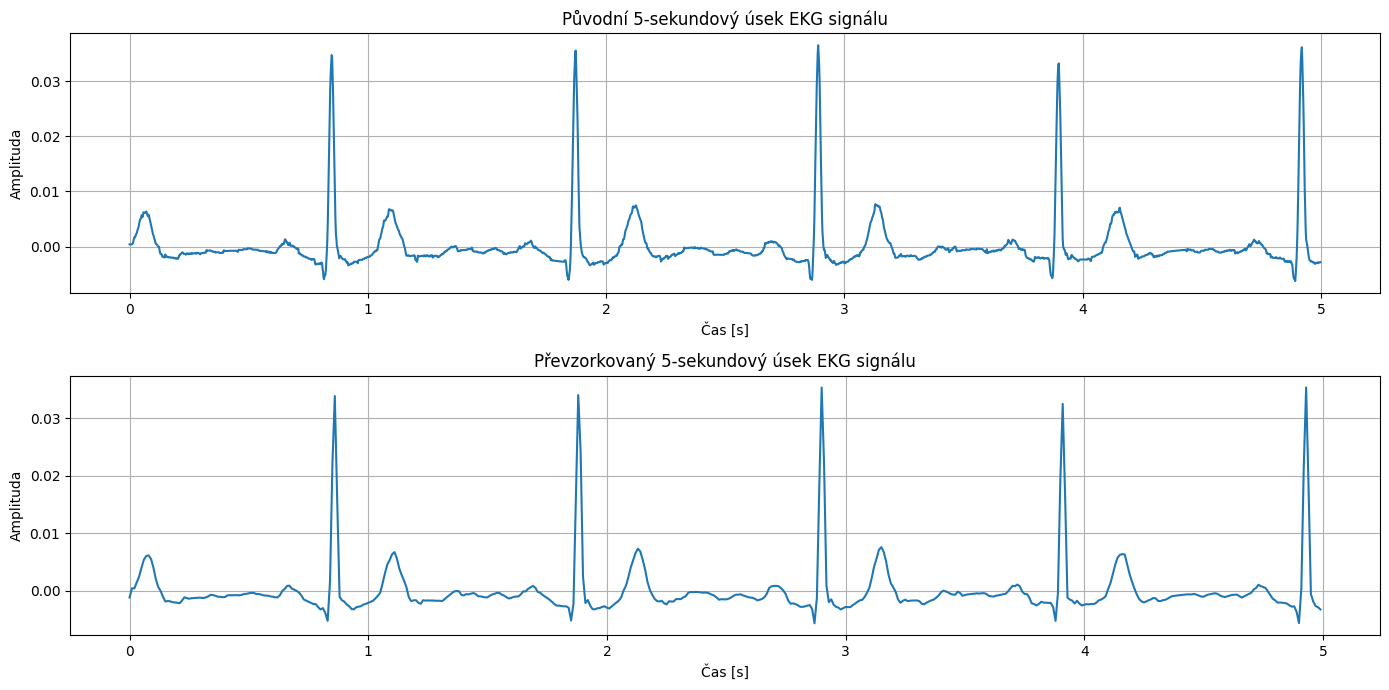

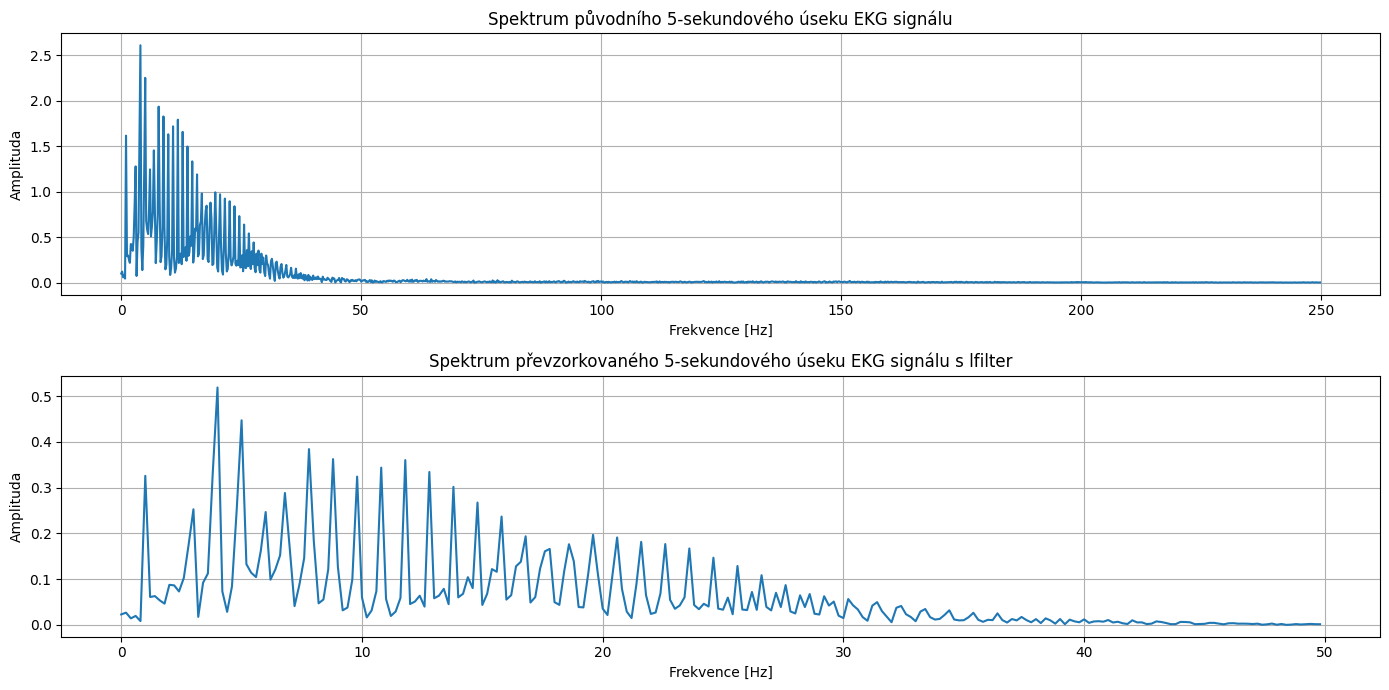

In [ ]:
# Zobrazení původního a převzorkovaného 5-sekundového signálu
plt.figure(figsize=(14, 7))

# Původní 5-sekundový úsek EKG signálu
plt.subplot(2, 1, 1)
plt.plot(casova_osa_puvodni, ekg_signal_5s)
plt.title('Původní 5-sekundový úsek EKG signálu')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)

# Převzorkovaný 5-sekundový úsek EKG signálu
plt.subplot(2, 1, 2)
plt.plot(casova_osa_prevzorkovany, ekg_signal_filtrovany)
plt.title('Převzorkovaný 5-sekundový úsek EKG signálu')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

# Spočítání spektra pro převzorkovaný signál
frekvence_prevzorkovany = np.fft.fftshift(np.fft.fftfreq(len(ekg_signal_filtrovany), 1/cilova_vzorkovaci_frekvence))
spektrum_prevzorkovany = np.fft.fftshift(np.abs(np.fft.fft(ekg_signal_filtrovany)))

# Nastavení polovin spekter
polovicni_len = len(frekvence) // 2
polovicni_prevzorkovany_len = len(frekvence_prevzorkovany) // 2

# Zobrazení spekter původního a převzorkovaného 5-sekundového signálu
plt.figure(figsize=(14, 7))

# Spektrum původního 5-sekundového úseku EKG signálu
plt.subplot(2, 1, 1)
plt.plot(frekvence[polovicni_len:], spektrum[polovicni_len:])
plt.title('Spektrum původního 5-sekundového úseku EKG signálu')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

# Spektrum převzorkovaného 5-sekundového úseku EKG signálu s lfilter
plt.subplot(2, 1, 2)
plt.plot(frekvence_prevzorkovany[polovicni_prevzorkovany_len:], spektrum_prevzorkovany[polovicni_prevzorkovany_len:])
plt.title('Spektrum převzorkovaného 5-sekundového úseku EKG signálu s lfilter')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

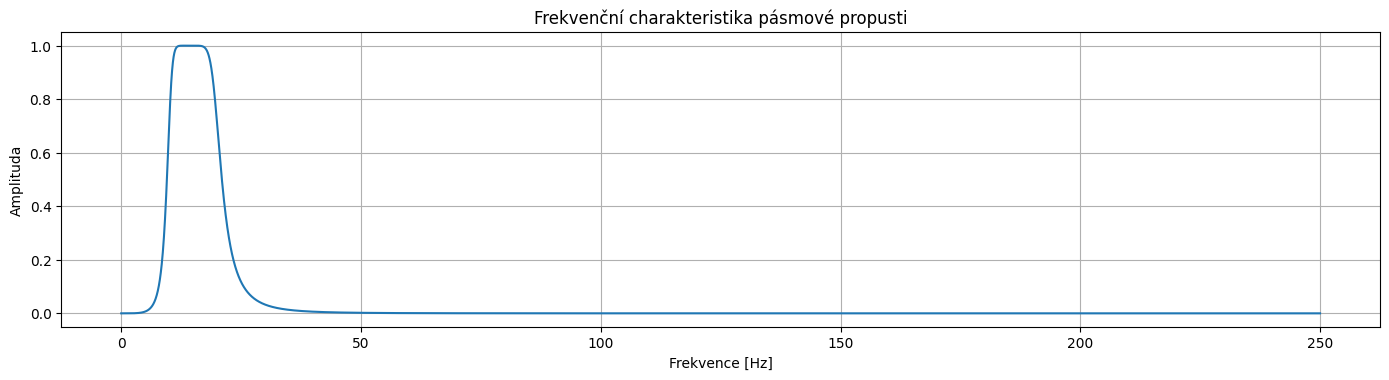

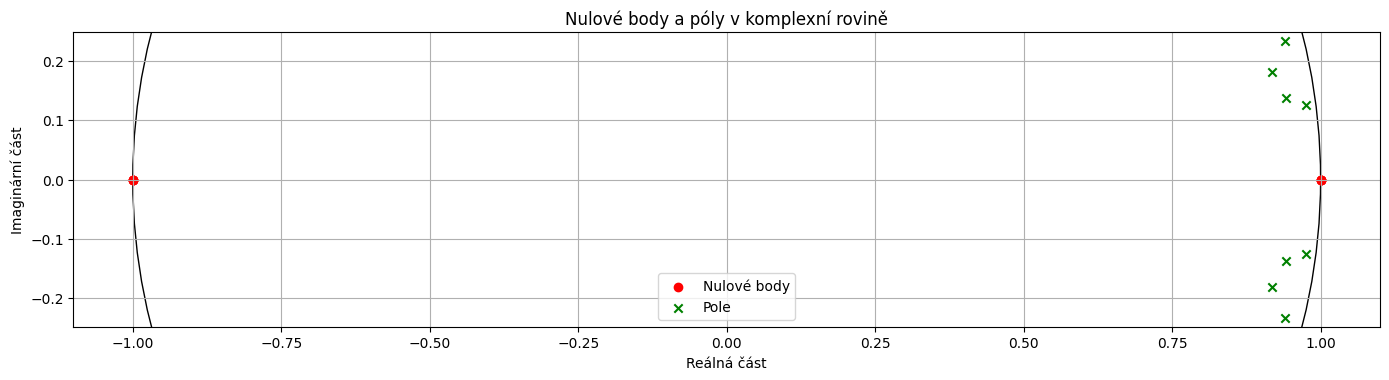

In [ ]:
from scipy.signal import freqz, sosfreqz, sos2zpk

# Definice pásmové propusti 10 - 20 Hz
dolni_mez = 10
horni_mez = 20
nyquist = 0.5 * fs

# Návrh filtru pásmové propusti pomocí funkce butter
b, a = butter(4, [dolni_mez/nyquist, horni_mez/nyquist], btype='band')

# Získání frekvenční charakteristiky filtru
w, h = freqz(b, a, worN=10000)

# Zobrazení frekvenční charakteristiky pásmové propusti
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w/np.pi, np.abs(h), label='Frekvenční charakteristika filtru')
plt.title("Frekvenční charakteristika pásmové propusti")
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

# Vytvoření koeficientů filtru pomocí funkce butter
sos = butter(4, [dolni_mez, horni_mez], btype='band', fs=fs, output='sos')

# Získání nulových bodů a pólů filtru
z, p, k = sos2zpk(sos)

# Zobrazení nulových bodů a pólů
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 2)
unit_circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(unit_circle)
plt.scatter(np.real(z), np.imag(z), marker='o', color='red', label='Nulové body')
plt.scatter(np.real(p), np.imag(p), marker='x', color='green', label='Pole')
plt.title('Nulové body a póly v komplexní rovině')
plt.xlabel('Reálná část')
plt.ylabel('Imaginární část')
plt.grid(True)
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


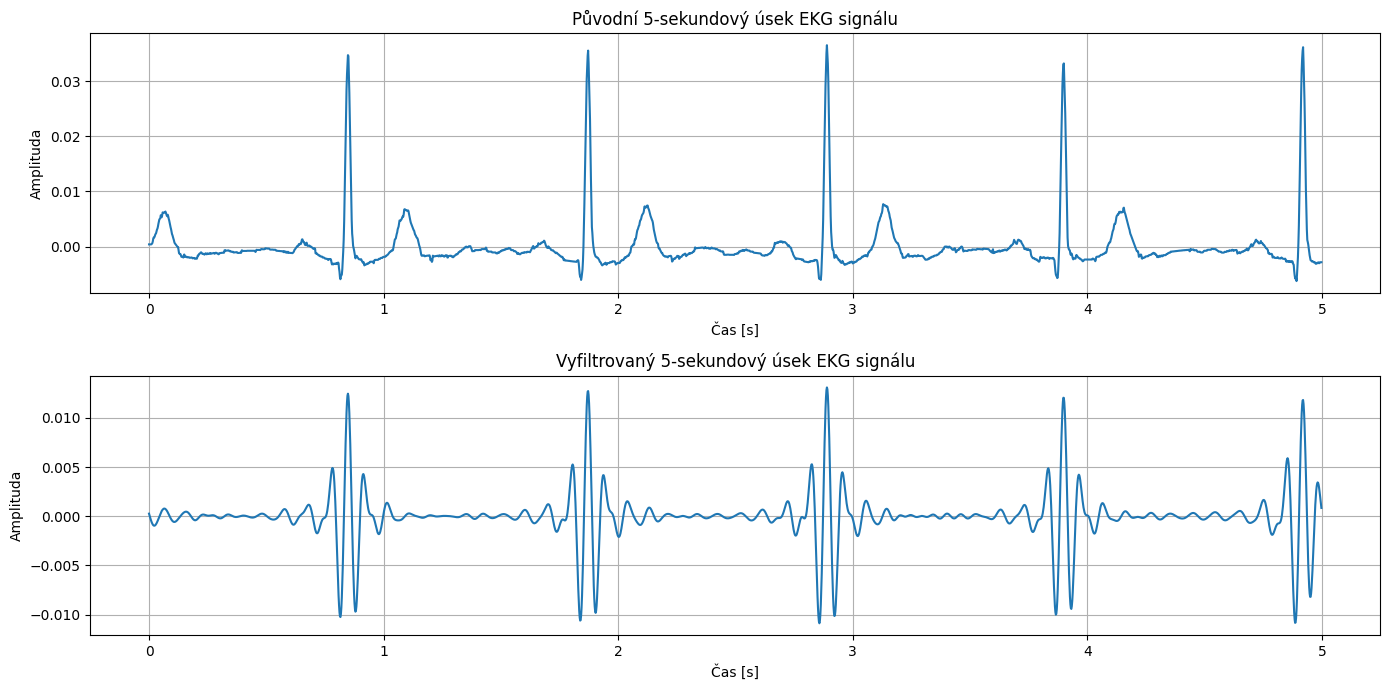

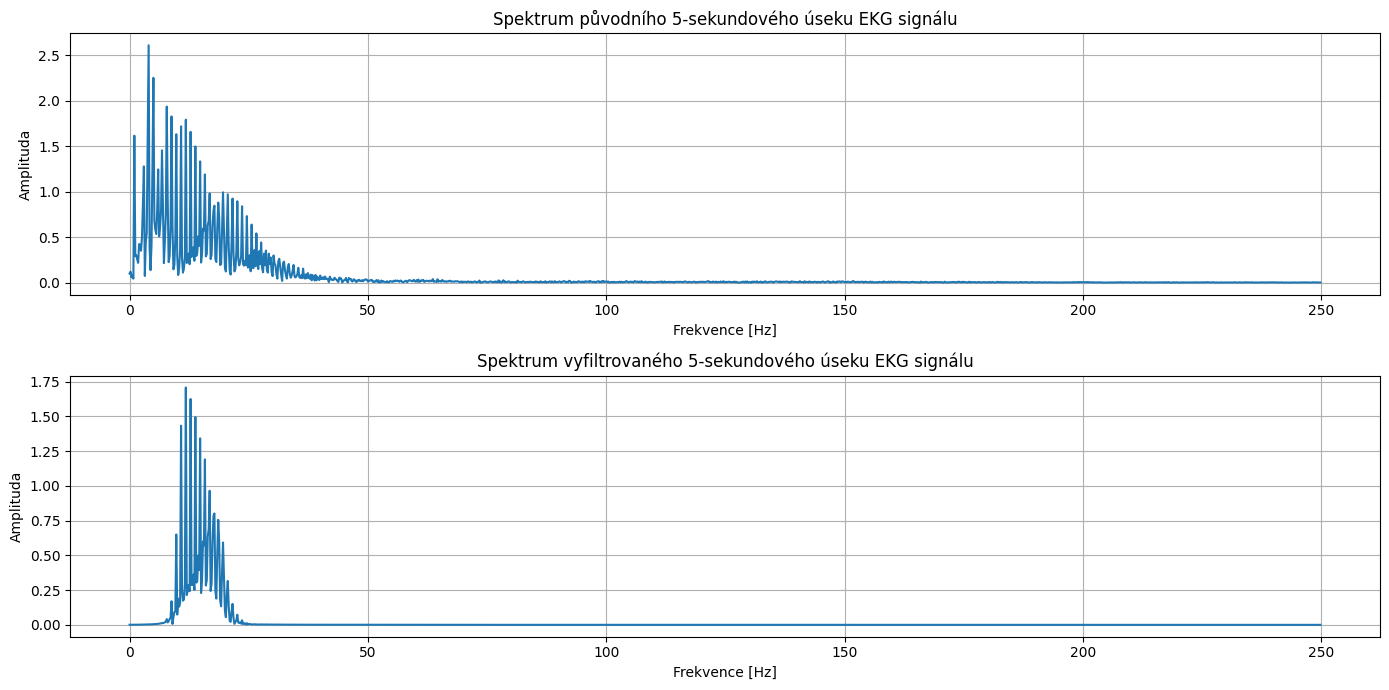

In [ ]:
from scipy.signal import filtfilt

# Aplikace filtru na 5-sekundový úsek signálu
ekg_signal_5s_filtr = filtfilt(b, a, ekg_signal[first_sample:last_sample])

# Zobrazení původního a vyfiltrovaného signálu v časové doméně
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(np.arange(first_sample, last_sample) / fs, ekg_signal[first_sample:last_sample])
plt.title('Původní 5-sekundový úsek EKG signálu')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(np.arange(first_sample, last_sample) / fs, ekg_signal_5s_filtr)
plt.title('Vyfiltrovaný 5-sekundový úsek EKG signálu')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

# Spočítání spekter vyfiltrovaného signálu
frekvence_filtr_5s = np.fft.fftshift(np.fft.fftfreq(len(ekg_signal_5s_filtr), 1/fs))
spektrum_filtr_5s = np.fft.fftshift(np.abs(np.fft.fft(ekg_signal_5s_filtr)))

# Nastavení polovin spekter
polovicni_len_filtr_5s = len(frekvence_filtr_5s) // 2

# Zobrazení spekter původního a vyfiltrovaného 5-sekundového signálu ve frekvenční doméně
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(frekvence[polovicni_len:], spektrum[polovicni_len:])
plt.title('Spektrum původního 5-sekundového úseku EKG signálu')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(frekvence_filtr_5s[polovicni_len_filtr_5s:], spektrum_filtr_5s[polovicni_len_filtr_5s:])
plt.title('Spektrum vyfiltrovaného 5-sekundového úseku EKG signálu')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



Nefiltrovaný signál obsahuje mnoho různých frekvencí, včetně frekvencí které nechceme. Filtrace nám pomohla tyto rušivé frekvence odstranit. Spektrum nefiltrovaného signálu ukazuje vysoké amplitudy mimo náš cílový rozsah. Po filtrování tyto vysoké amplitudy zmizely a viděli jsme čistější spektrum.

Filtrace pouze z jedné strany by mohla způsobit fázový posun. Ten by mohl ovlivnit přesnost časových informací v signálu.


### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

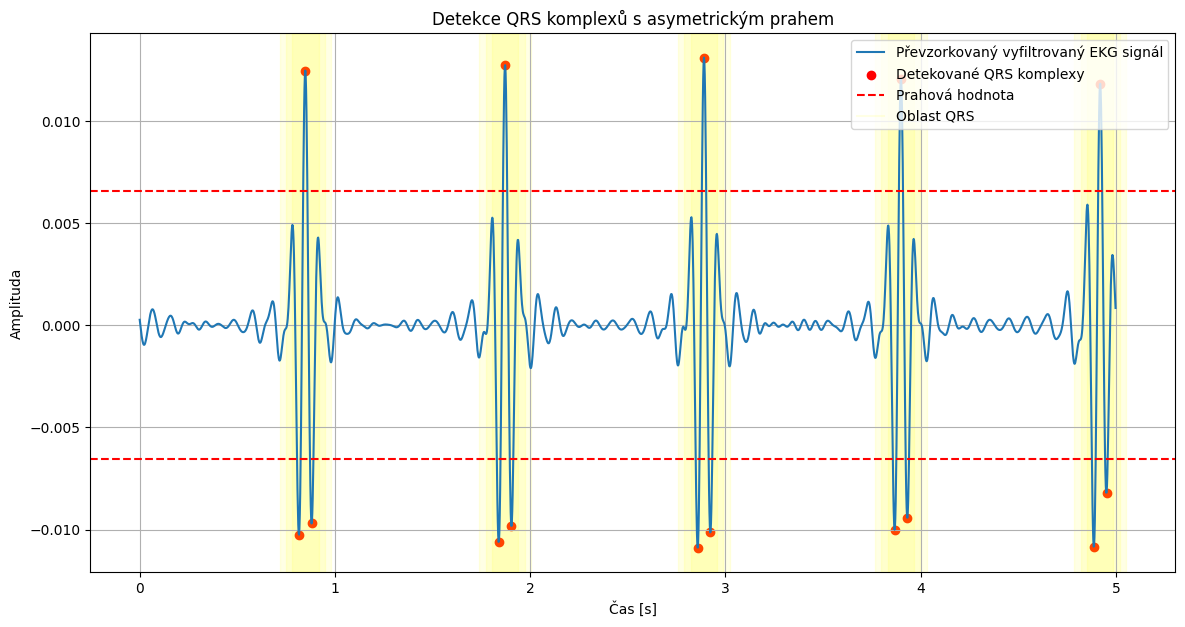

In [ ]:
from scipy.signal import find_peaks

# Získání absolutní hodnoty signálu
ekg_signal_5s_abs = np.abs(ekg_signal_5s_filtr)

# Výpočet prahu
threshold = 0.5 * np.max(ekg_signal_5s_abs)

# Detekce QRS překracujících práh
peaks, _ = find_peaks(ekg_signal_5s_abs, height=threshold)

# Výpočet časové osy pro vykreslení
time_axis = np.arange(len(ekg_signal_5s_filtr)) / fs

# Vykreslení signálu a detekce QRS komplexů
plt.figure(figsize=(14, 7))

# Vykreslení signálu
plt.plot(time_axis, ekg_signal_5s_filtr, label='Převzorkovaný vyfiltrovaný EKG signál')

# Vykreslení detekovaných QRS komplexů
plt.scatter(time_axis[peaks], ekg_signal_5s_filtr[peaks], color='red', label='Detekované QRS komplexy')

# Vykreslení prahové hodnoty
plt.axhline(y=threshold, color='red', linestyle='--', label='Prahová hodnota')
plt.axhline(y=-threshold, color='red', linestyle='--')

# Vykreslení oblastí QRS komplexů
for peak in peaks:
    plt.axvspan(time_axis[peak] - 0.1, time_axis[peak] + 0.1, color='yellow', alpha=0.1)

# Zobrazení legendy
plt.plot([], [], color='yellow', alpha=0.1, label='Oblast QRS')
plt.title('Detekce QRS komplexů s asymetrickým prahem')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

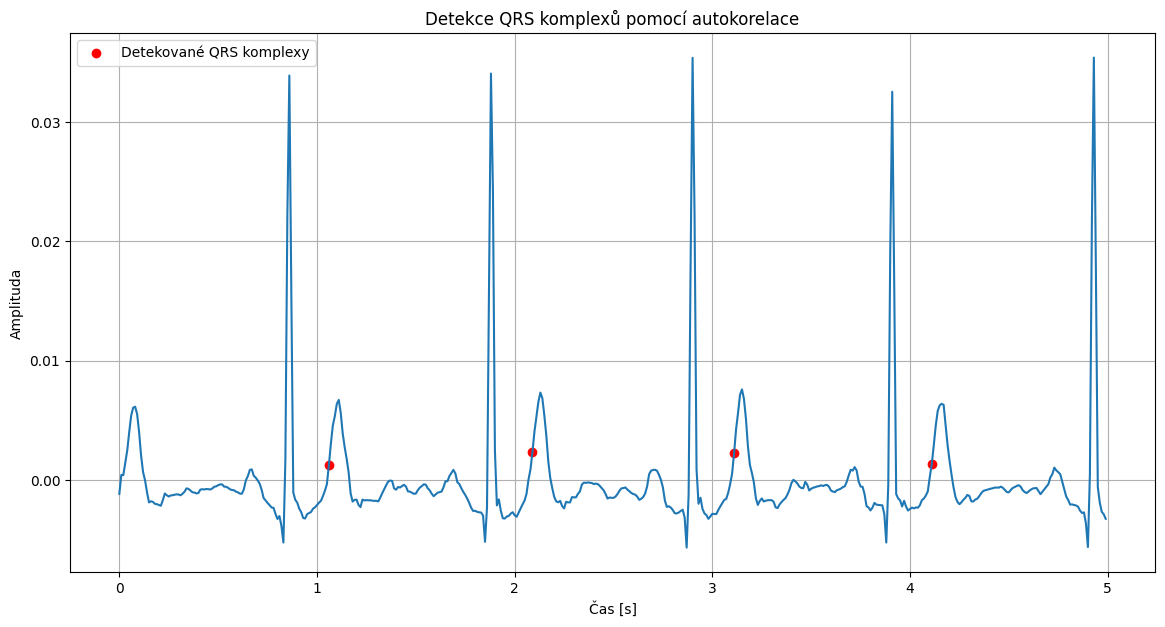

In [ ]:
# Výběr vzorku jednoho QRS komplexu
QRS_sample = ekg_signal_filtrovany[peaks[0]:peaks[0]+int(cilova_vzorkovaci_frekvence/2)]

# Autokorelace signálu s vybraným vzorkem QRS komplexu
autokorelace = np.correlate(ekg_signal_filtrovany, QRS_sample, mode='same')

# Detekce QRS komplexů na základě autokorelace
QRS_autocorr_peaks, _ = find_peaks(autokorelace, height=0.8*np.max(autokorelace))

# Zobrazení signálu s detekcemi
plt.figure(figsize=(14, 7))

plt.plot(casova_osa_prevzorkovany, ekg_signal_filtrovany)
plt.scatter(casova_osa_prevzorkovany[QRS_autocorr_peaks], ekg_signal_filtrovany[QRS_autocorr_peaks], color='red', label='Detekované QRS komplexy')

plt.title('Detekce QRS komplexů pomocí autokorelace')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)

plt.show()

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

In [273]:
# Zde napište váš kód

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

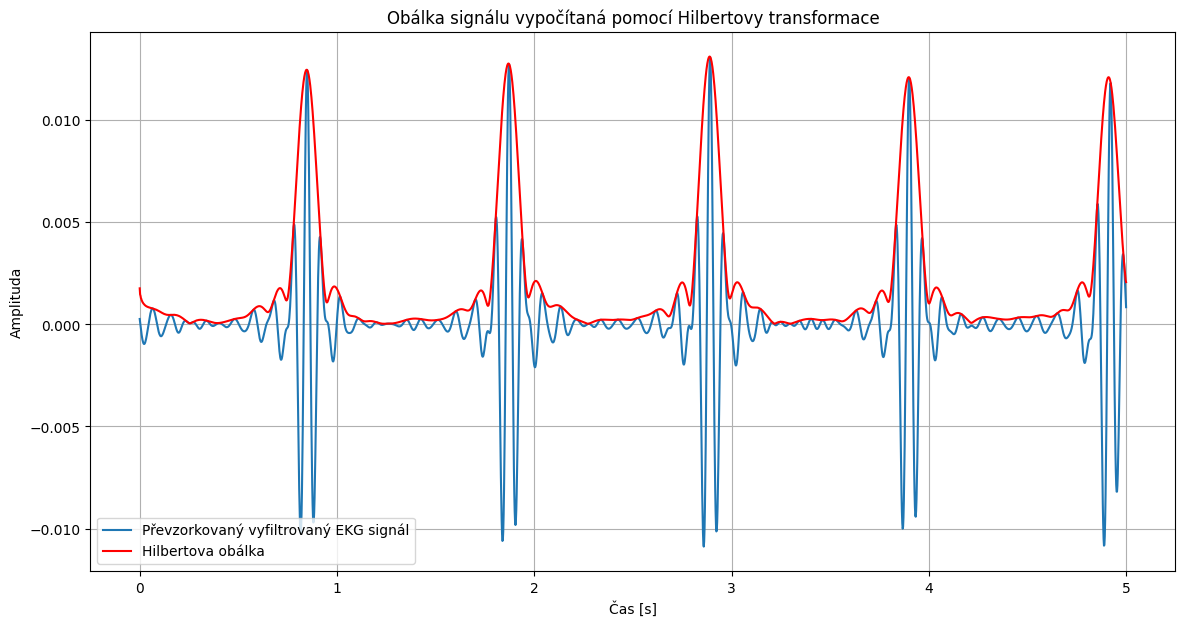

In [ ]:
from scipy.fft import fft, ifft
from scipy.signal import find_peaks

# Funkce pro výpočet Hilbertovy transformace
def hilbert_transform(signal):
    # Výpočet FFT
    fft_result = fft(signal)

    # Nulování pravé symetrické části spektra
    fft_result[len(fft_result)//2 + 1:] = 0

    # Násobení levé části spektra 2 (kromě prvního a středního binu)
    fft_result[1:len(fft_result)//2] *= 2

    # Výpočet inverzní FFT
    hilbert_transform_result = ifft(fft_result)

    return hilbert_transform_result

# Výpočet Hilbertovy obálky
hilbert_envelope = np.abs(hilbert_transform(ekg_signal_5s_filtr))

# Vykreslení původního signálu a jeho obálky
plt.figure(figsize=(14, 7))
plt.plot(time_axis, ekg_signal_5s_filtr, label='Převzorkovaný vyfiltrovaný EKG signál')
plt.plot(time_axis, hilbert_envelope, label='Hilbertova obálka', linestyle='-', color='red')  # Změnil jsem styl na plnou žlutou čáru
plt.title('Obálka signálu vypočítaná pomocí Hilbertovy transformace')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

Otočený signál nám vadí při metodách detekce na základě amplitudy a detekce pomocí obálky Hilbertovy transformace. A nevadí nám při metodách detekce na základě časové nebo frekvenční analýzy a autokorelaci.

Takže obecně, pokud metoda bere v potaz znaménko signálu, tak jí vadí otočený signál. Naopak pokud se metoda zaměřuje pouze na velikost signálu, tak ji signál nevadí.

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

In [274]:
# Zde napište váš kód

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [ ]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód